In [13]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print("This is the detection result of the image : ",path)
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [2]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path =  os.getenv('HOME')+'/aiffel/ocr_python/sample.jpg'  

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
#detect_text(path)

total 2552500
-rw-r--r--  1 aiffel-dj15 aiffel-dj15      25128  3월  5 19:40 '[밑시딥]7.4-7.6.ipynb'
drwxr-xr-x 28 aiffel-dj15 aiffel-dj15       4096  3월 18 09:55  aiffel
drwxr-xr-x 26 aiffel-dj15 aiffel-dj15       4096  1월 20 00:15  anaconda3
-rw-r--r--  1 aiffel-dj15 aiffel-dj15       4645  2월 25 22:28  attention.py
-rw-r--r--  1 aiffel-dj15 aiffel-dj15     889842  3월 10 22:58  ChatbotData.csv
-rw-r--r--  1 aiffel-dj15 aiffel-dj15 2274826926  2월  5 14:24  cuda-repo-ubuntu1804-11-2-local_11.2.1-460.32.03-1_amd64.deb
drwxr-xr-x  2 aiffel-dj15 aiffel-dj15       4096  1월 16 15:06  Desktop
drwxr-xr-x  2 aiffel-dj15 aiffel-dj15       4096  1월 16 15:06  Documents
drwxr-xr-x  5 aiffel-dj15 aiffel-dj15       4096  3월 22 22:02  Downloads
-rw-r--r--  1 aiffel-dj15 aiffel-dj15     506134  3월  8 21:55 '[E14]폐렴 진단.ipynb'
-rw-r--r--  1 aiffel-dj15 aiffel-dj15    2544622  3월 16 21:59 '[E16]SRGAN.ipynb'
-rw-r--r--  1 aiffel-dj15 aiffel-dj15      90429  3월 19 12:03 '[E17] SBR.ipynb'
-rw-r--r--  1 aiffel-d

In [3]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj15/.keras-ocr/craft_mlt_25k.h5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Looking for /home/aiffel-dj15/.keras-ocr/crnn_kurapan.h5


In [4]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            #print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
        print(index,"files are processed")
    return cropped_image_path_list

In [5]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/ocr_test'
#img_file_path = work_dir + '/test_image.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 
import os
arr = os.listdir(work_dir)
print(arr)

cropped_image_path_list = []
result_path = work_dir + "/" + "output" 
arr.sort()
print(arr)
for i in range(1, len(arr)) :
    cropped_image_path_list += crop_word_regions(work_dir + "/" + arr[i], result_path + "/" + str(i+1))

['test14.jpg', 'test5.jpg', 'test9.jpg', 'test13.jpg', 'test3.jpg', 'test4.jpg', 'test11.jpg', 'test6.jpg', 'output', 'test12.jpg', 'test7.jpg', 'test10.jpg', 'test2.jpg', 'test1.jpg', 'test8.jpg', 'test15.jpg']
['output', 'test1.jpg', 'test10.jpg', 'test11.jpg', 'test12.jpg', 'test13.jpg', 'test14.jpg', 'test15.jpg', 'test2.jpg', 'test3.jpg', 'test4.jpg', 'test5.jpg', 'test6.jpg', 'test7.jpg', 'test8.jpg', 'test9.jpg']
0 files are processed
0 files are processed
0 files are processed
0 files are processed
1 files are processed
1 files are processed
1 files are processed
1 files are processed
2 files are processed
2 files are processed
3 files are processed
3 files are processed
4 files are processed
4 files are processed
5 files are processed
5 files are processed
6 files are processed
6 files are processed
7 files are processed
7 files are processed
8 files are processed
8 files are processed
9 files are processed
10 files are processed
10 files are processed
11 files are processed
1

In [6]:
import re
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    result = []
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        text = re.sub('[^a-zA-Z0-9]',' ',recognized_data['text']).strip()
        if text != "" :
            result.append(text)
    #print("Done")
    return result
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
result = recognize_images(cropped_image_path_list)
print(result)

['ip', 'et', '4', 'tt', 'ge', 'i anes', 'ie', 'Re', 'LoLitea', 'A', 'LoLites', 'Tu', 'rab', 'iT', 'ite', 'rtearns', 'a', 'et', 'a', 'r     re aso ots     a', 'a', '2', '2', 'oat i  4', 'i a', 'at', 'Pde', 'DIFFICU', 'Es pees', 'ROADS', 'LEAD TO', 'BEAUTIFUL', 'DESTIN', 'A TIO', 'BS']


케라스의 파이프라인은 read 함수를 통해 url, 파일 경로 등에서 파일을 읽어들인다. 

In [7]:
images_full_paths = []
for i in range(1, len(arr)) :
    #cropped_image_path_list += crop_word_regions(work_dir + "/" + arr[i], result_path + "/" + str(i+1))
    path = work_dir + "/" + arr[i]
    images_full_paths.append(path)
images = [ keras_ocr.tools.read(url) for url in images_full_paths]

In [8]:
prediction_groups = [pipeline.recognize([url]) for url in images_full_paths]

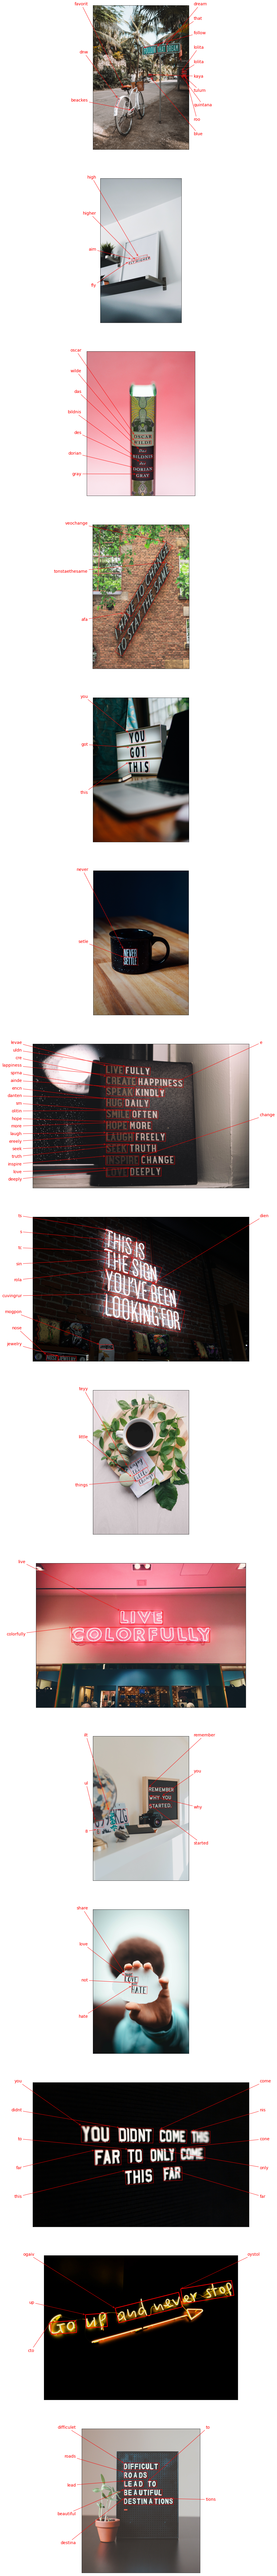

In [15]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(160, 160))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [14]:
for i in images_full_paths :
    detect_text(i)

This is the detection result of the image :  /home/aiffel-dj15/aiffel/ocr_python/ocr_test/test1.jpg
Texts:

"FOLLOW THAT DREAM
KAYA
LOLita
ABI UE
LOLita
Tulum
Quintana Roo
FAVORIT
BEALH
BEACHe
DANTHER
FAVORIT
"

"FOLLOW"

"THAT"

"DREAM"

"KAYA"

"LOLita"

"ABI"

"UE"

"LOLita"

"Tulum"

"Quintana"

"Roo"

"FAVORIT"

"BEALH"

"BEACHe"

"DANTHER"

"FAVORIT"
bounds: (1251,3331),(1277,3405),(1266,3408),(1241,3335)
This is the detection result of the image :  /home/aiffel-dj15/aiffel/ocr_python/ocr_test/test10.jpg
Texts:

"dte Ca
SARE NOT REPLACEABLE
TUSH
AIM HIGH
FLY HIGHER
"

"dte"

"Ca"

"SARE"

"NOT"

"REPLACEABLE"

"TUSH"

"AIM"

"HIGH"

"FLY"

"HIGHER"
bounds: (1470,3414),(2054,3263),(2076,3347),(1492,3498)
This is the detection result of the image :  /home/aiffel-dj15/aiffel/ocr_python/ocr_test/test11.jpg
Texts:

"OSCAR
WILDE
Das
BILDNIS
дел
DORIAN
GRAY
"

"OSCAR"

"WILDE"

"Das"

"BILDNIS"

"дел"

"DORIAN"

"GRAY"
bounds: (1580,3924),(1986,3914),(1988,4012),(1582,4022)
This is the 